# Plot drone

## Loading modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
linearized_inputs = {
    'z': 'f',
    'phi': 'm_x',
    'theta': 'm_y',
    'psi': 'm_z'
}

var_labels = {
    'x': 'x', 'y': 'y', 'z':'z', 'theta': '\\theta', 'phi': '\\phi', 'psi': '\\psi',
    'f': 'f', 'm_x': 'm_x', 'm_y': 'm_y', 'm_z': 'm_z'
}
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## Functions

In [3]:
def time_plot(variables, sim_out, title:str=None, filename:str=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        lines = list()
        ax, var = zipped
        ax.grid()
        base_name = var.replace('d', '')
        base_label = var.replace(base_name, var_labels[base_name])
        ylabel = f'${base_label}$'
        lines += ax.plot(sim_out['t'], sim_out[var], label=f'${base_label}$', color='C0')
        ref_name = f'ref_{var}'
        if ref_name in sim_out.columns:
            r_label = f'$r_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[ref_name], label=r_label, linestyle='--', color='k')
            ylabel += f', {r_label}'
        
        error_name = f'e_{var}'
        if error_name in sim_out.columns:
            error_label = f'$e_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[error_name], label=error_label, linestyle='--', color='C1')
            ylabel += f', {error_label}'

        input_name = f'u_{var}'
        if input_name in sim_out.columns:
            input_label = f'$u_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C2')
            # ylabel += f', ${input_name}$' if var == 'z' else f', $u_{{\\{var}}}$'
            ylabel += f', {input_label}'
        
        if var in linearized_inputs.keys():
            twinx = ax.twinx()
            input_name = linearized_inputs[var]
            input_label = f'${var_labels[input_name]}$'
            lines += twinx.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C3')
            twinx.set_ylabel(input_label)
        
        labels = [l.get_label() for l in lines]  
        ax.legend(lines, labels)
        
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=ylabel)
        else:
            ax.set(ylabel=ylabel, xlabel='Time (seconds)')
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [4]:
filename = '../drone_sim_out.csv'
sim_out = pd.read_csv(filename, index_col=0, dtype=float)
sim_out

,t,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,...,u_theta,u_psi,f,m_x,m_y,m_z,f1,f2,f3,f4
0.0,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.067221,0.000000e+00,13.001300,-0.086991,0.067221,0.000000e+00,9.714893,-3.291349,9.782114,-3.204358
1.0,0.000427,0.010000,-0.000037,0.010000,0.000029,6.157269e-23,4.020328e-19,1.187622e-08,0.000056,-1.187681e-08,...,0.067239,-4.020944e-19,12.997454,-0.087019,0.067239,-4.020944e-19,9.711999,-3.290400,9.779238,-3.203382
2.0,0.004702,0.009999,-0.000410,0.010001,0.000317,6.704987e-22,-1.191257e-18,1.435627e-06,0.000610,-1.435658e-06,...,0.067426,1.190587e-18,12.959176,-0.087289,0.067426,1.190587e-18,9.683186,-3.280955,9.750612,-3.193667
3.0,0.014702,0.009991,-0.001286,0.010007,0.000993,3.473618e-21,-1.329287e-18,1.400465e-05,0.001902,-1.400147e-05,...,0.067853,1.325813e-18,12.870899,-0.087913,0.067853,1.325813e-18,9.616740,-3.259174,9.684594,-3.171261
4.0,0.024702,0.009973,-0.002168,0.010021,0.001674,7.904384e-21,3.645317e-18,3.945396e-05,0.003187,-3.942504e-05,...,0.068269,-3.653221e-18,12.784383,-0.088526,0.068269,-3.653221e-18,9.551621,-3.237827,9.619890,-3.149300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565.0,5.328683,0.616547,-0.392359,-0.395066,0.511336,8.414901e-17,7.068332e-17,-1.012670e+00,-6.443842,-5.411560e-01,...,1.965861,-1.548323e-16,13.281807,-1.497133,1.965861,-1.548323e-16,9.037015,-4.127609,11.002877,-2.630476
566.0,5.328683,0.616547,-0.392359,-0.395066,0.511336,8.414901e-17,7.068332e-17,-1.012670e+00,-6.443842,-5.411560e-01,...,1.965862,-1.548323e-16,13.281807,-1.497133,1.965862,-1.548323e-16,9.037015,-4.127609,11.002877,-2.630476
567.0,5.328683,0.616547,-0.392359,-0.395066,0.511336,8.414901e-17,7.068332e-17,-1.012670e+00,-6.443842,-5.411560e-01,...,1.965862,-1.548323e-16,13.281807,-1.497133,1.965862,-1.548323e-16,9.037015,-4.127609,11.002877,-2.630476
568.0,5.328683,0.616547,-0.392359,-0.395066,0.511336,8.414901e-17,7.068332e-17,-1.012670e+00,-6.443842,-5.411560e-01,...,1.965862,-1.548323e-16,13.281807,-1.497133,1.965862,-1.548323e-16,9.037015,-4.127609,11.002877,-2.630476


## Drone positions over time

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$x$, $r_{x}$, $e_{x}$, $u_{x}$'>,
        <AxesSubplot:ylabel='$y$, $r_{y}$, $e_{y}$, $u_{y}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$z$, $r_{z}$, $e_{z}$, $u_{z}$'>],
       dtype=object))

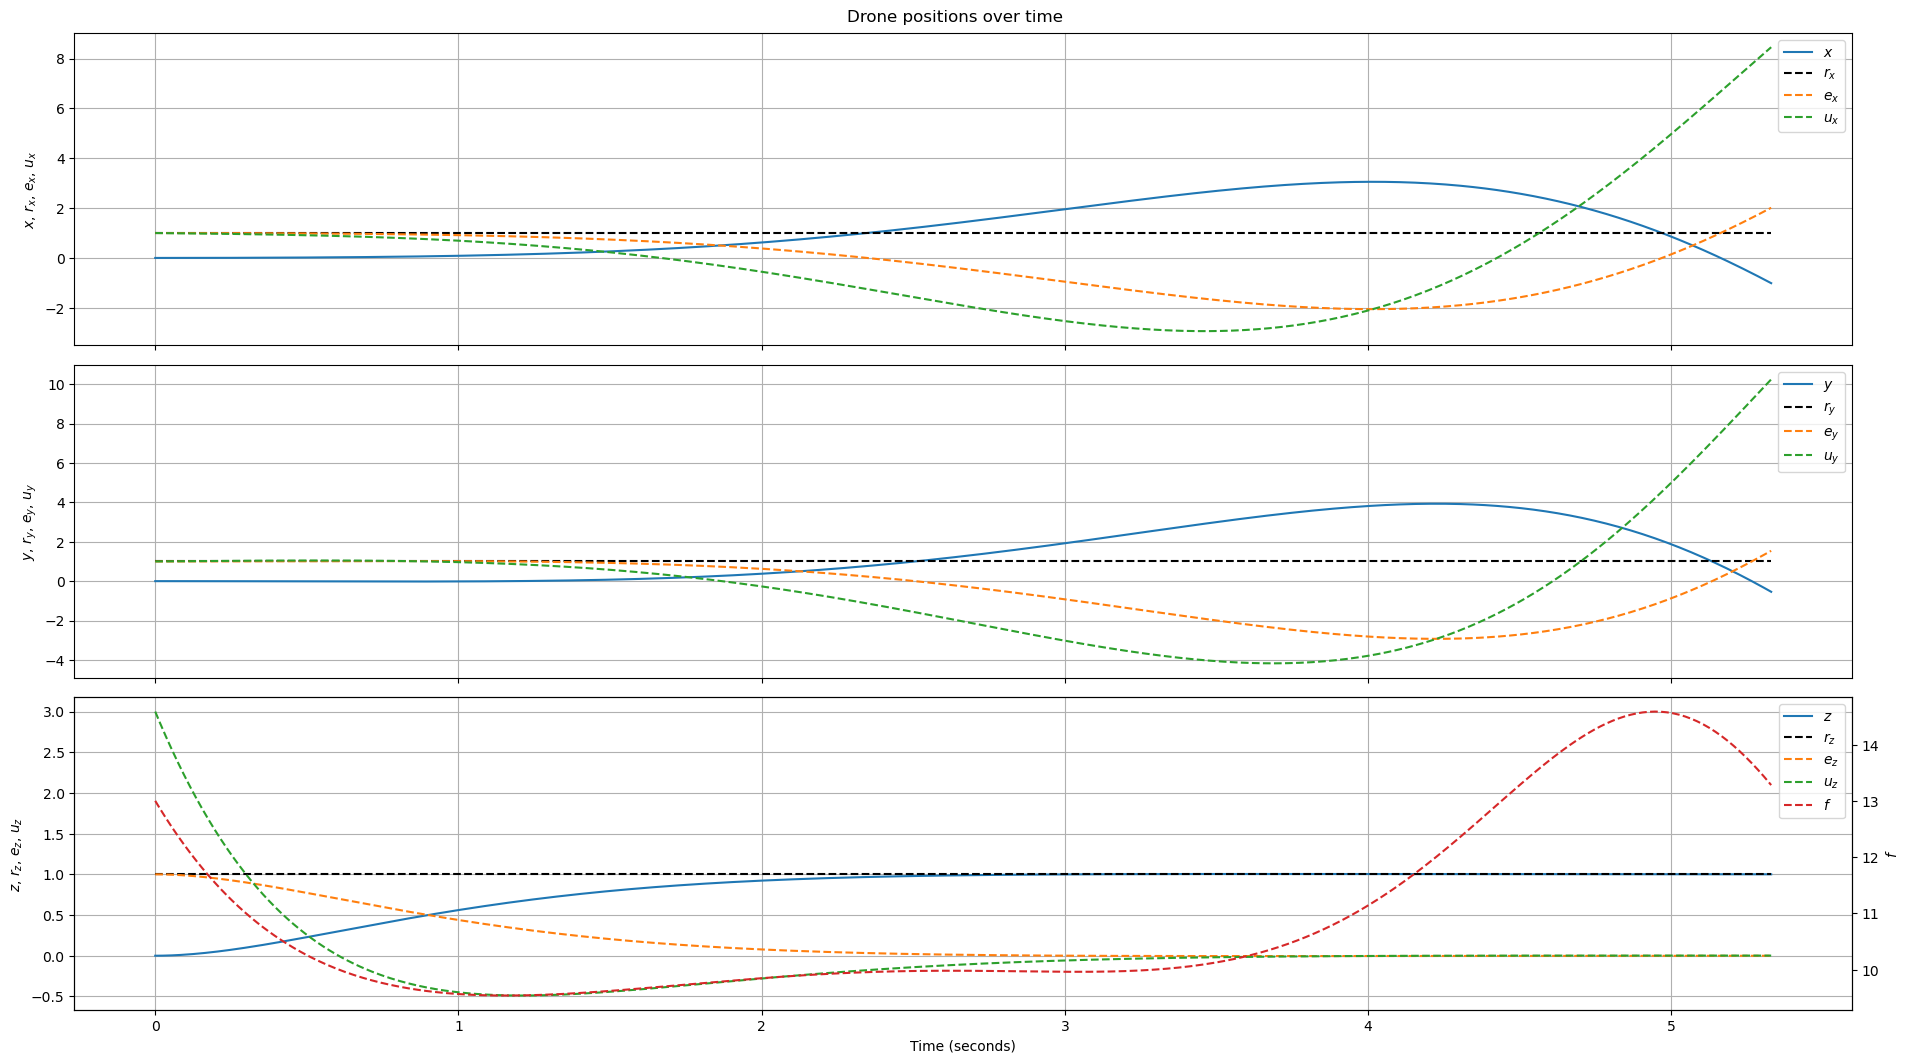

In [5]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time',
    filename=os.path.join(output_dir, 'positions_over_time.png'))

## Drone directions over time

(<Figure size 1920x1080 with 6 Axes>,
 array([<AxesSubplot:ylabel='$\\phi$, $r_{\\phi}$, $e_{\\phi}$, $u_{\\phi}$'>,
        <AxesSubplot:ylabel='$\\theta$, $r_{\\theta}$, $e_{\\theta}$, $u_{\\theta}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$\\psi$, $r_{\\psi}$, $e_{\\psi}$, $u_{\\psi}$'>],
       dtype=object))

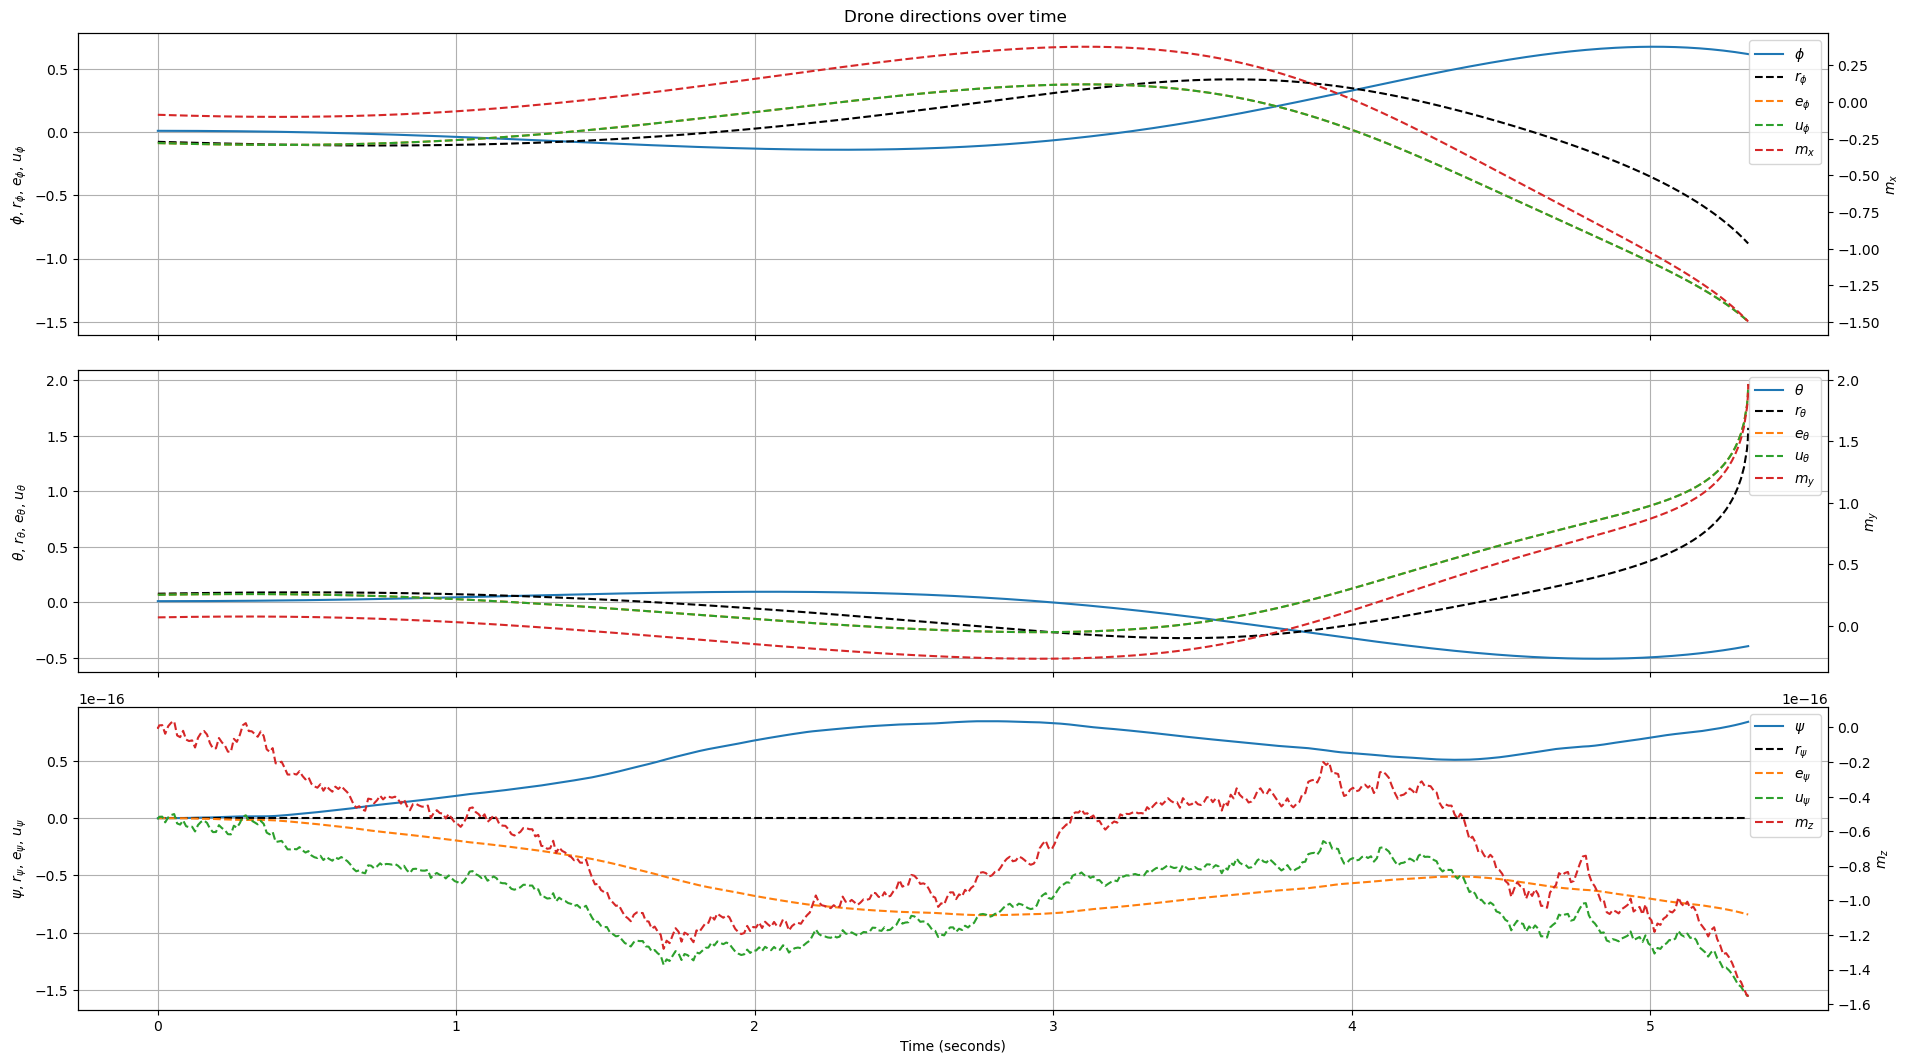

In [6]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time',
    filename=os.path.join(output_dir, 'directions_over_time.png'))

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$dx$, $r_{dx}$'>,
        <AxesSubplot:ylabel='$dy$, $r_{dy}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$dz$, $r_{dz}$'>],
       dtype=object))

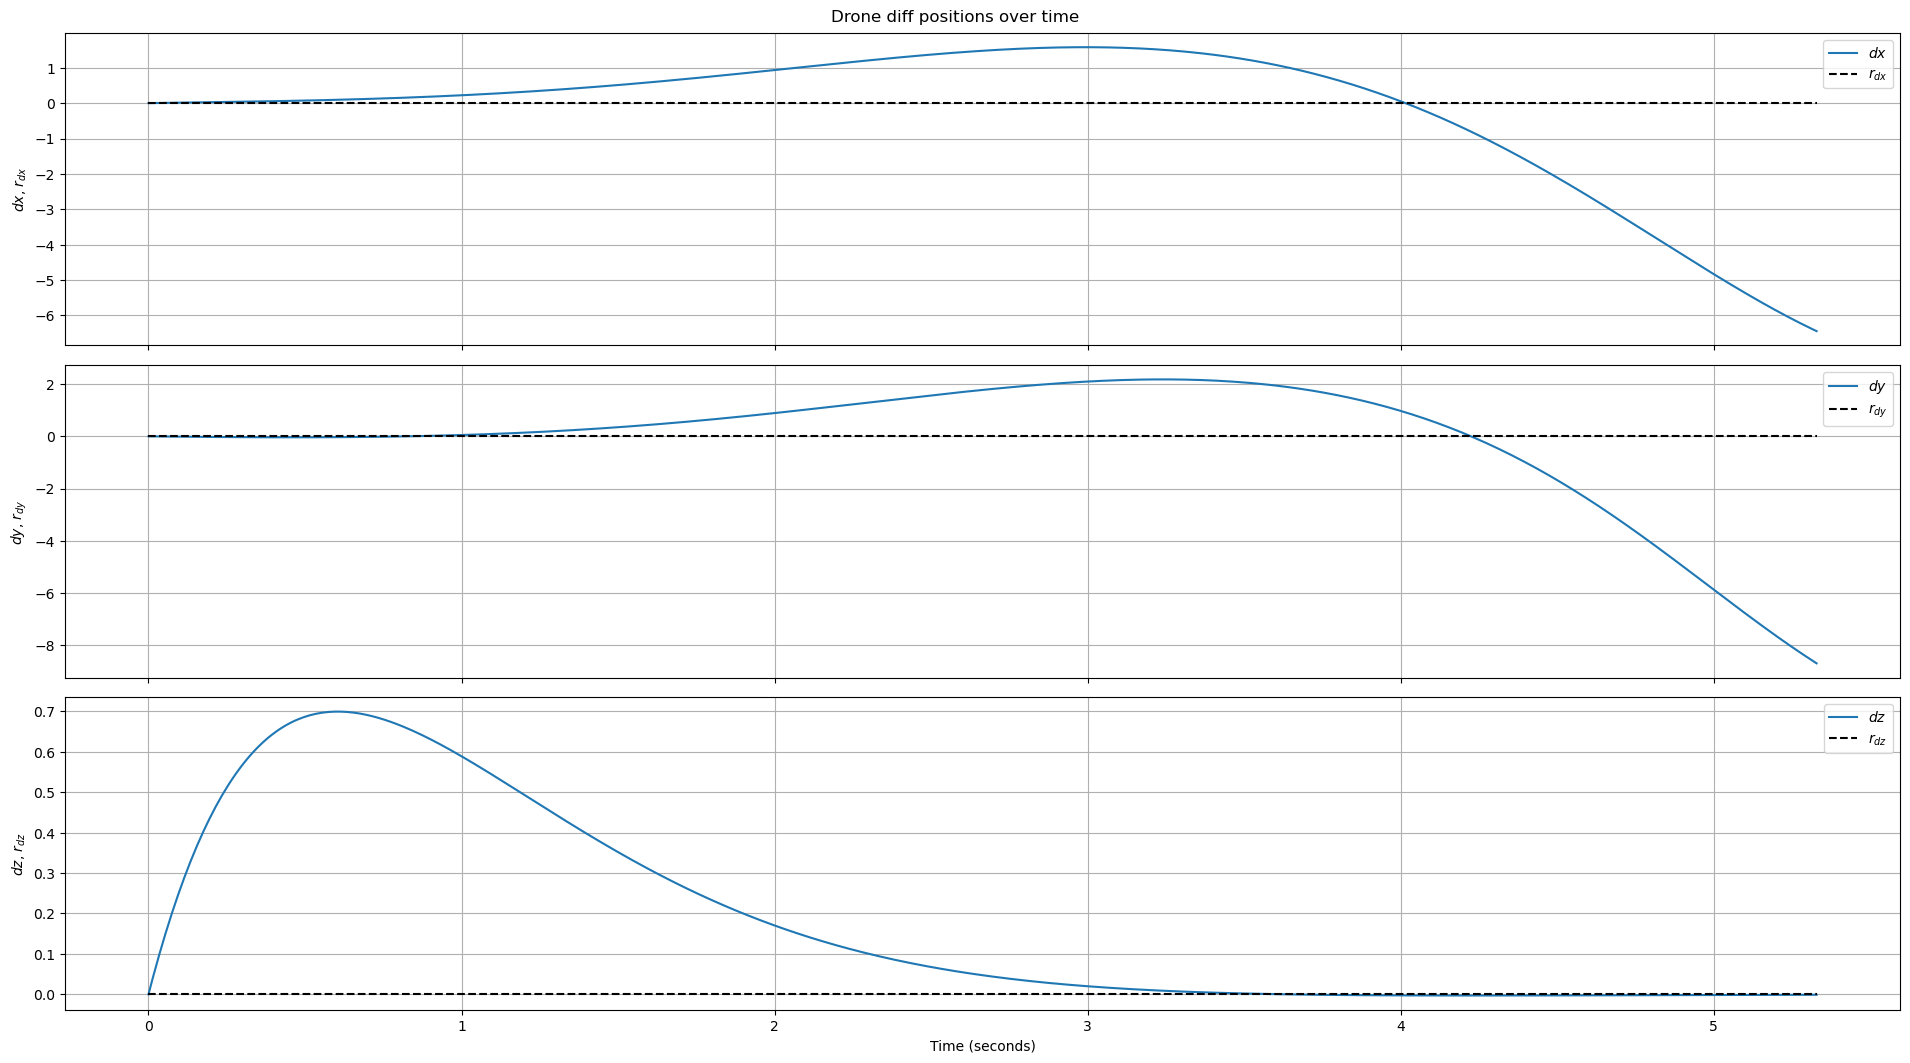

In [7]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time',
    filename=os.path.join(output_dir, 'diff_positions_over_time.png'))

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$d\\phi$'>, <AxesSubplot:ylabel='$d\\theta$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$d\\psi$, $r_{d\\psi}$'>],
       dtype=object))

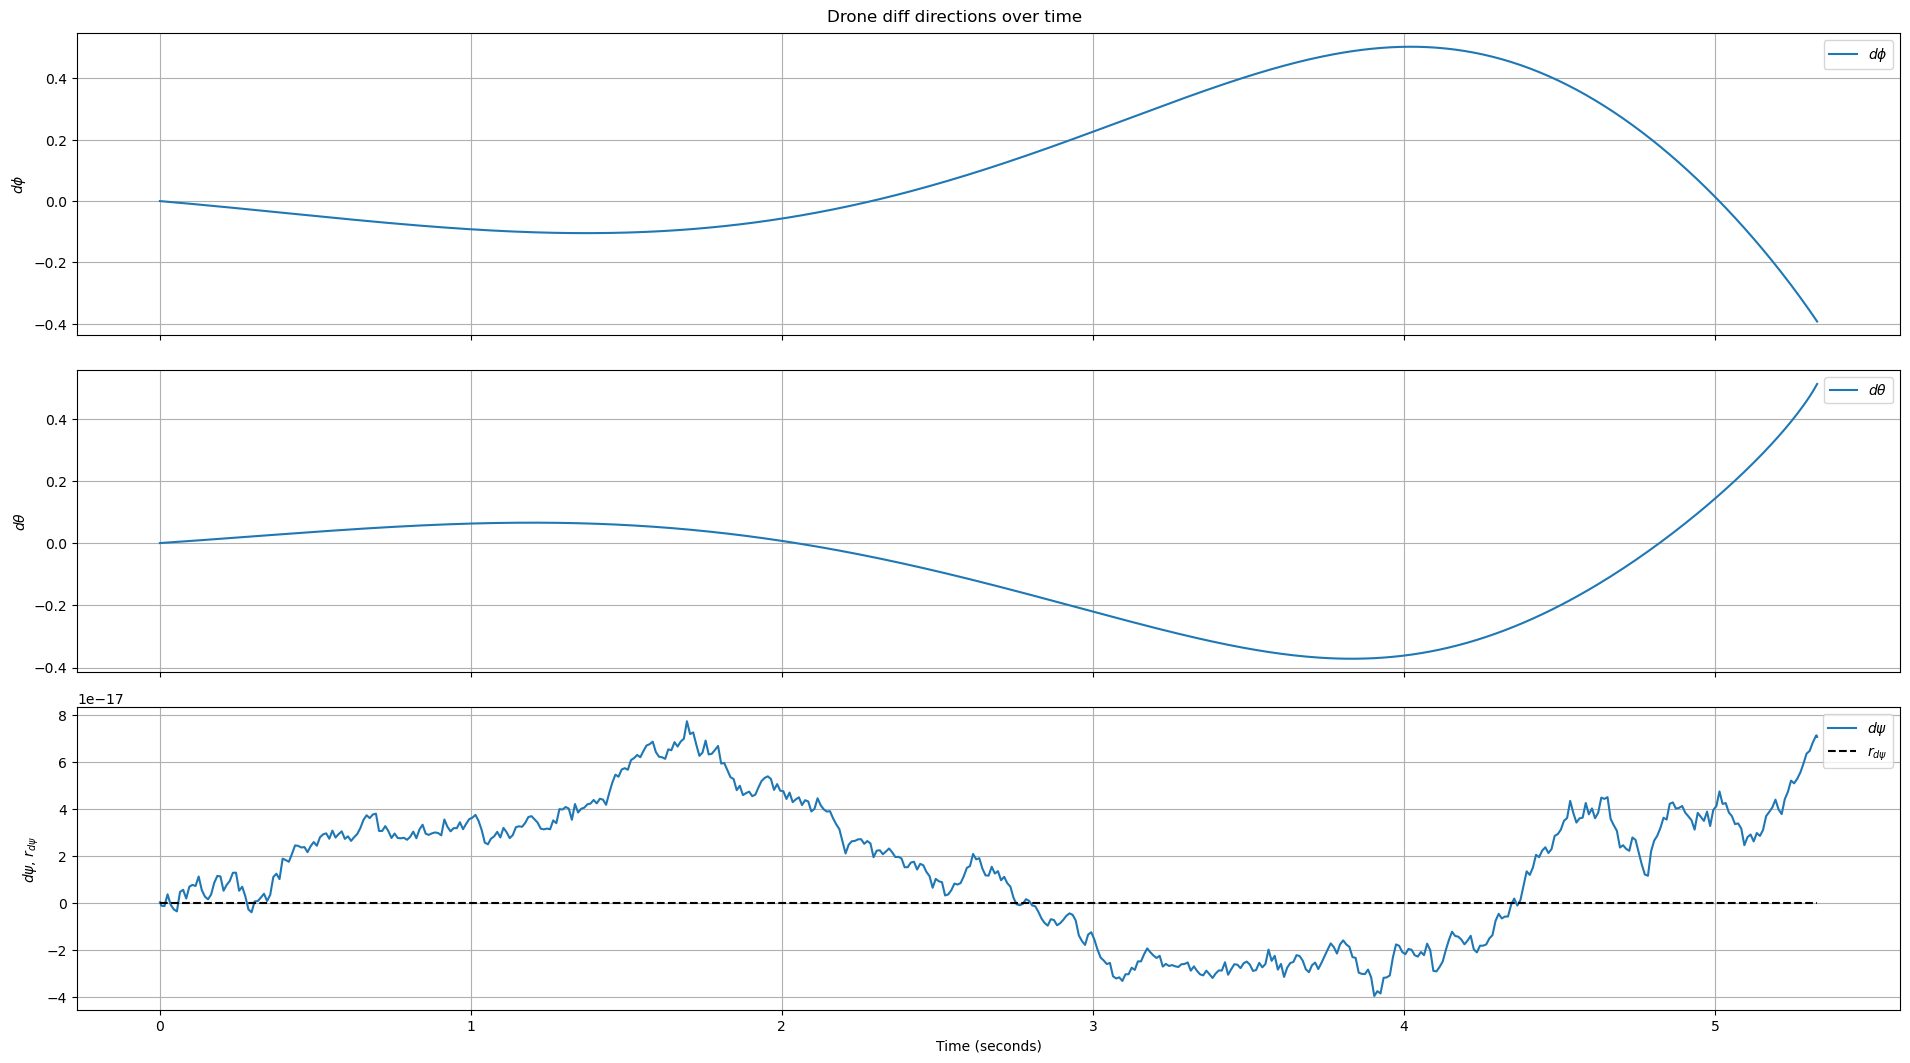

In [8]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time',
    filename=os.path.join(output_dir, 'diff_directions_over_time.png'))

## Feedback Linearized Inputs

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$f$'>, <AxesSubplot:ylabel='$m_x$'>,
        <AxesSubplot:ylabel='$m_y$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$m_z$'>],
       dtype=object))

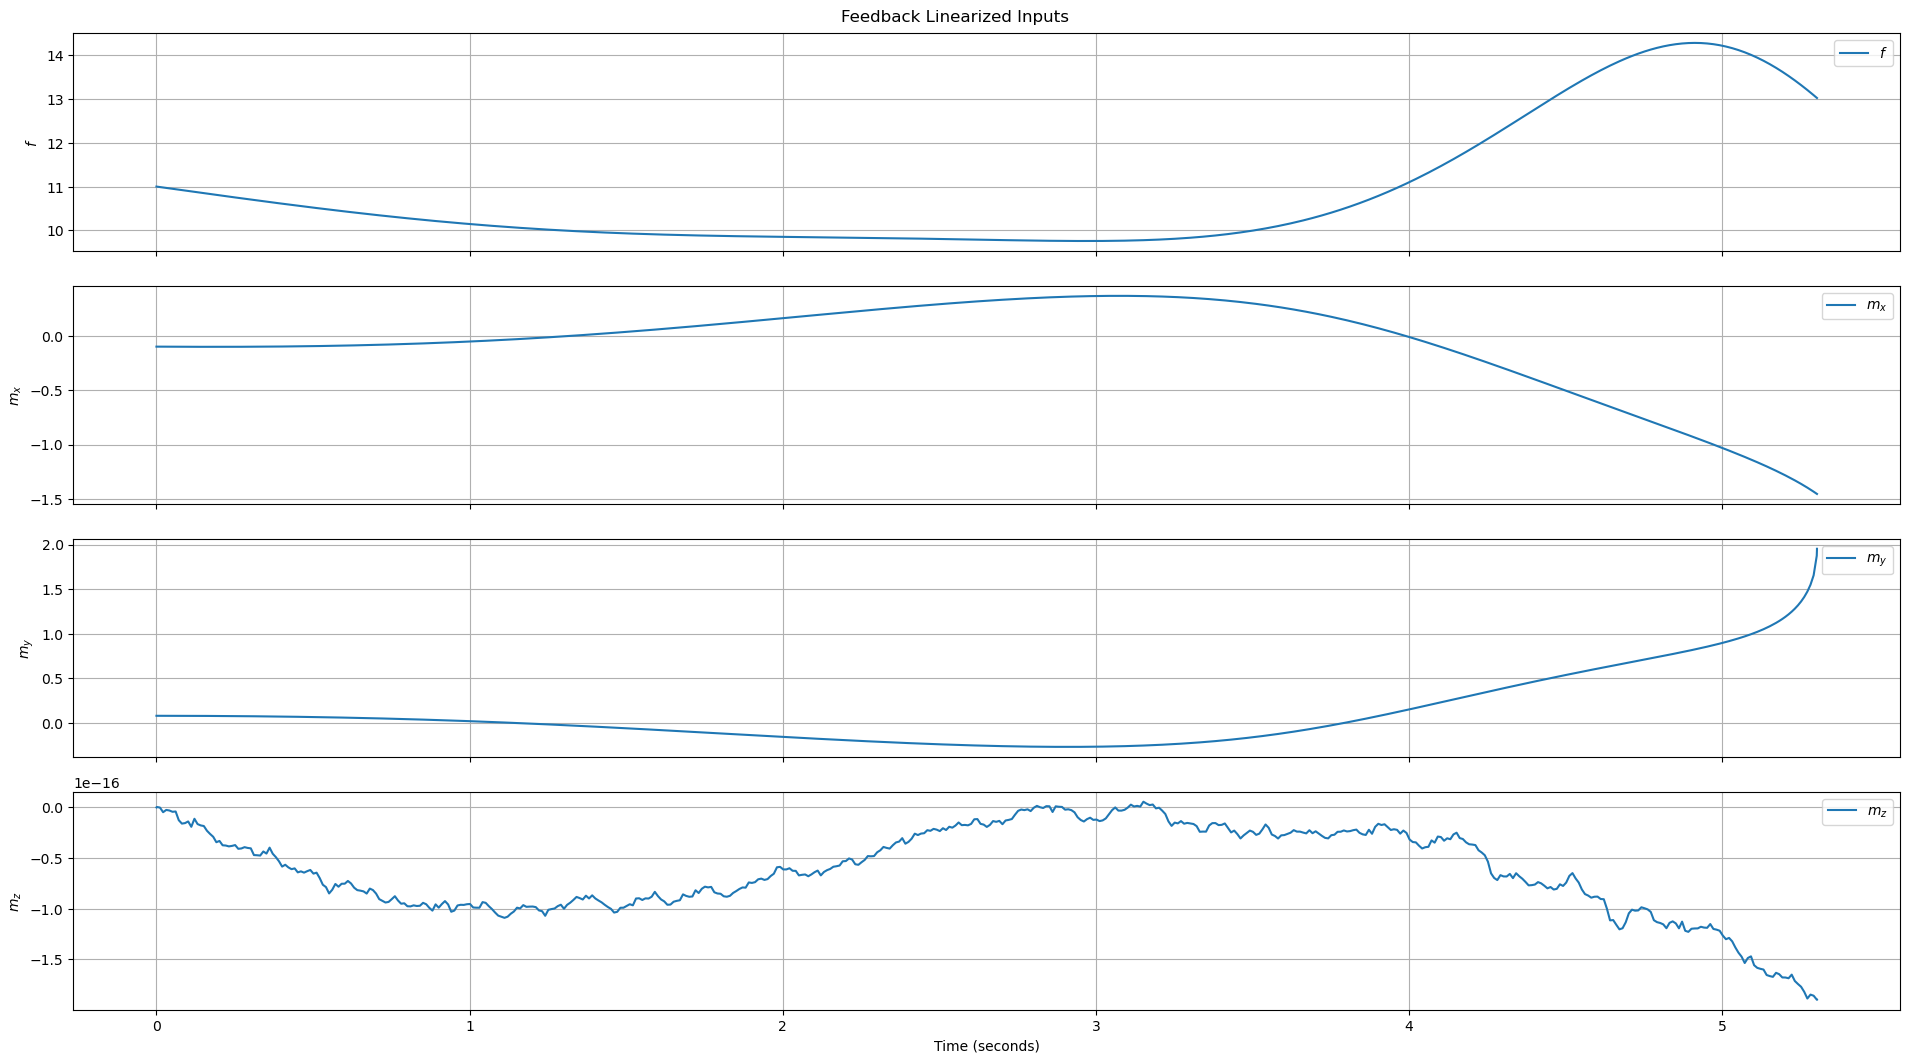

In [9]:
time_plot(['f', 'm_x', 'm_y', 'm_z'], sim_out, title='Feedback Linearized Inputs',
    filename=os.path.join(output_dir, 'linearized_inputs_over_time.png'))

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

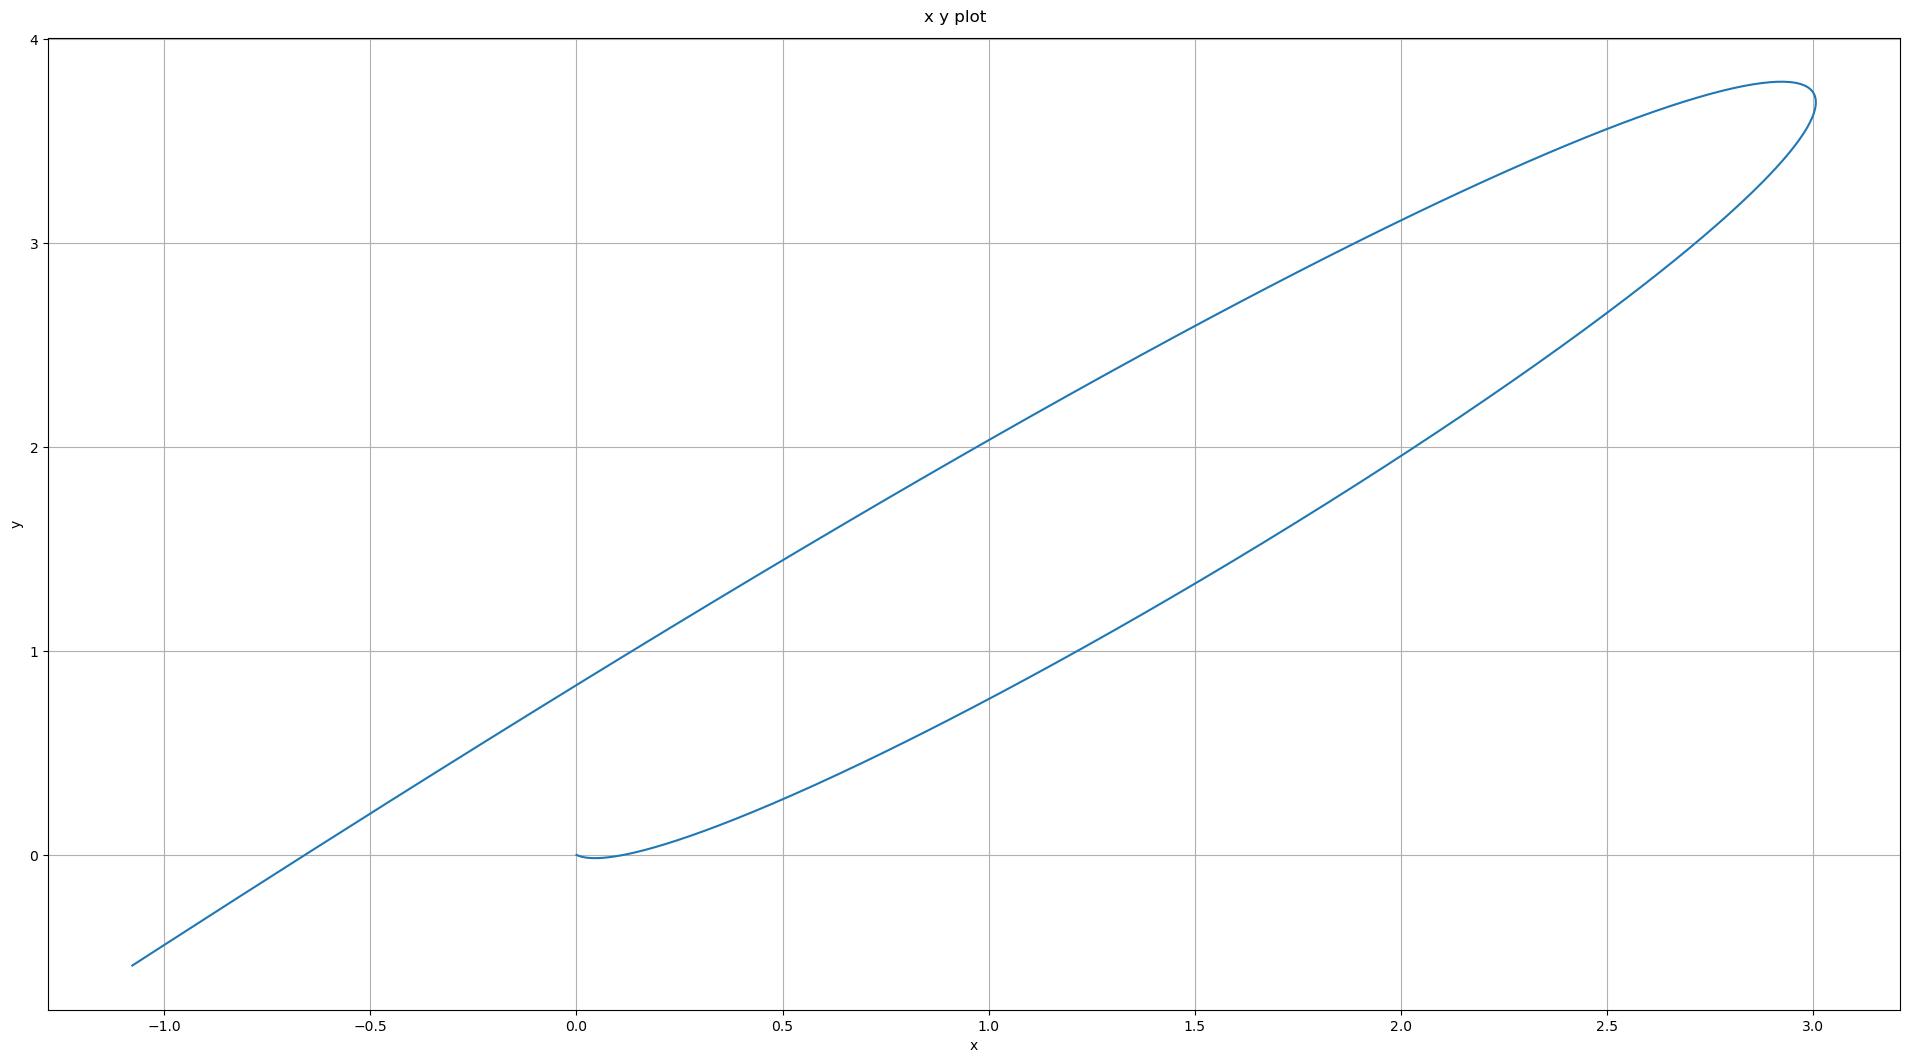

In [10]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x} {y} plot',
    filename=os.path.join(output_dir, f'{x}_{y}_plot.png'))